In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
plt.style.use('seaborn-whitegrid')

### Dataset Loading

In [3]:
dataset = pd.read_csv('../input/births/births.csv')

In [4]:
quartiles = np.percentile(dataset['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
dataset = dataset.query('(births > @mu - 5* @sig) & (births < @mu + 5 * @sig)')
dataset['day'] = dataset['day'].astype(int)

In [5]:
dataset.index = pd.to_datetime(10000 * dataset.year + 100 * dataset.month + dataset.day, format = '%Y%m%d')

In [6]:
dataset_by_date = dataset.pivot_table('births', [dataset.index.month, dataset.index.day])

In [7]:
dataset_by_date.index = [pd.datetime(2012, month, day) for(month, day) in dataset_by_date.index]

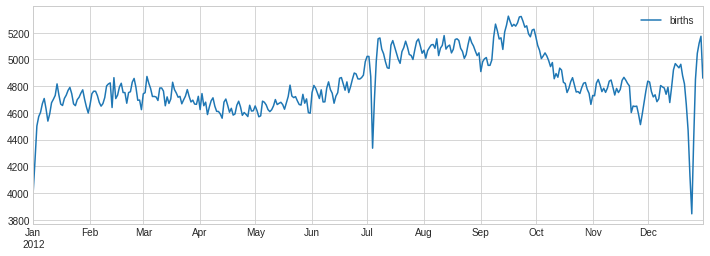

In [8]:
fig, ax = plt.subplots(figsize = (12, 4))
dataset_by_date.plot(ax = ax)

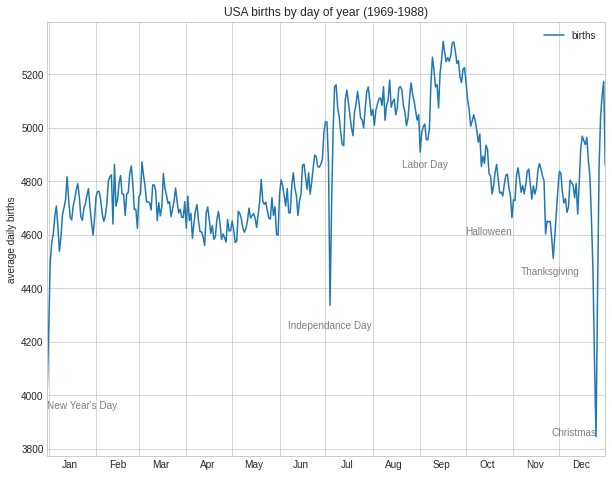

In [9]:
fig, ax = plt.subplots(figsize = (10, 8))
dataset_by_date.plot(ax = ax)
style = dict(size = 10, color = 'gray')
ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independance Day", ha = "center", **style)
ax.text('2012-9-4', 4850, "Labor Day", ha = "center", **style)
ax.text('2012-10-31', 4600, "Halloween", ha = 'right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha = 'center', **style)
ax.text('2012-12-25', 3850, "Christmas", ha = 'right', **style)

ax.set(title = "USA births by day of year (1969-1988)", ylabel = "average daily births")

ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday = 15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))

### Text Position

Text(0.2, 0.2, '. Figure: (0.2, 0.2)')

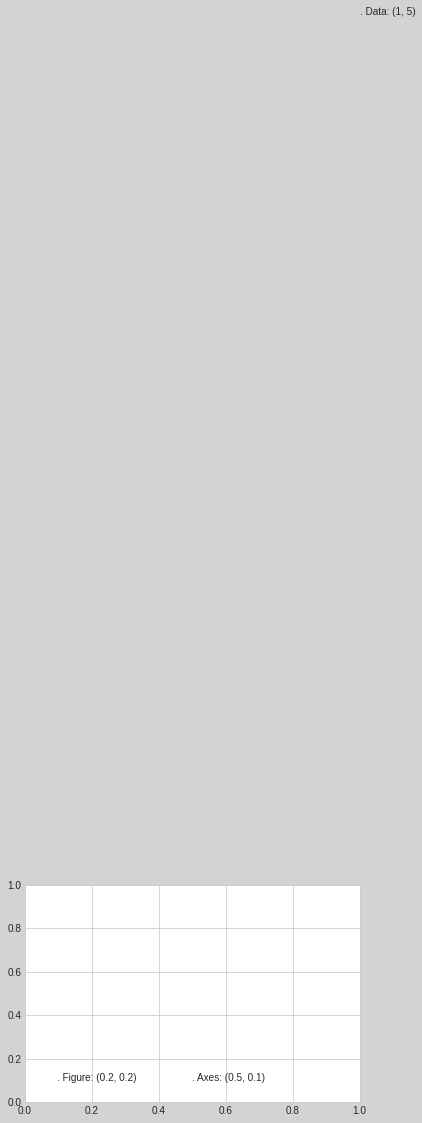

In [10]:
fig, ax = plt.subplots(facecolor = "lightgray")
ax.axis = ([0, 10, 0, 10])
ax.text(1, 5, ". Data: (1, 5)", transform = ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform = ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform = fig.transFigure)

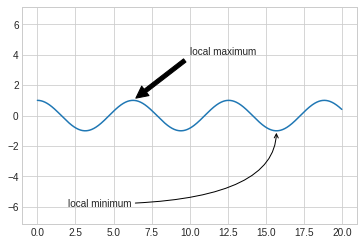

In [11]:
%matplotlib inline
fig, ax = plt.subplots()
x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')
ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
arrowprops=dict(arrowstyle="->",
connectionstyle="angle3,angleA=0,angleB=-90"));

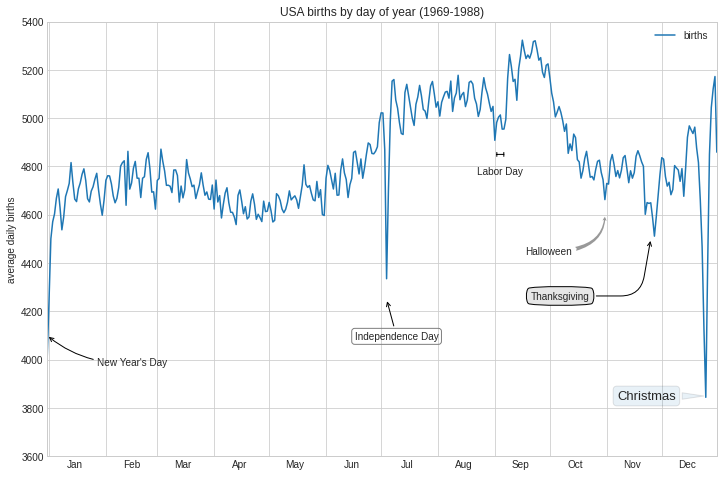

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
dataset_by_date.plot(ax=ax)
# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100), xycoords='data',
xytext=(50, -30), textcoords='offset points',
arrowprops=dict(arrowstyle="->",
connectionstyle="arc3,rad=-0.2"))
ax.annotate("Independence Day", xy=('2012-7-4', 4250), xycoords='data',
bbox=dict(boxstyle="round", fc="none", ec="gray"),xytext=(10, -40), textcoords='offset points', ha='center',arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })
ax.annotate('Halloween', xy=('2012-10-31', 4600), xycoords='data',
xytext=(-80, -40), textcoords='offset points',
arrowprops=dict(arrowstyle="fancy",
fc="0.6", ec="none",
connectionstyle="angle3,angleA=0,angleB=-90"))
ax.annotate('Thanksgiving', xy=('2012-11-25', 4500), xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
arrowprops=dict(arrowstyle="->",
connectionstyle="angle,angleA=0,angleB=80,rad=20"))
ax.annotate('Christmas', xy=('2012-12-25', 3850), xycoords='data',
            xytext=(-30, 0), textcoords='offset points',
size=13, ha='right', va="center",
bbox=dict(boxstyle="round", alpha=0.1),
arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));
# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
ylabel='average daily births')
# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));
ax.set_ylim(3600, 5400);

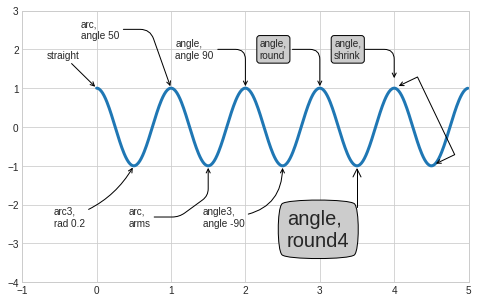

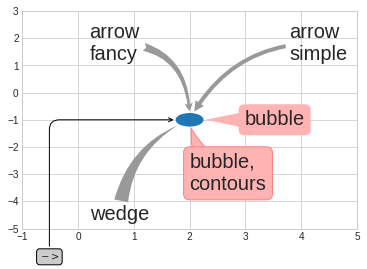

In [13]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np


fig = plt.figure(1, figsize=(8, 5))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-1, 5), ylim=(-4, 3))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=3)

ax.annotate('straight',
            xy=(0, 1), xycoords='data',
            xytext=(-50, 30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('arc3,\nrad 0.2',
            xy=(0.5, -1), xycoords='data',
            xytext=(-80, -60), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=.2"))

ax.annotate('arc,\nangle 50',
            xy=(1., 1), xycoords='data',
            xytext=(-90, 50), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc,angleA=0,armA=50,rad=10"))

ax.annotate('arc,\narms',
            xy=(1.5, -1), xycoords='data',
            xytext=(-80, -60), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc,angleA=0,armA=40,angleB=-90,armB=30,rad=7"))

ax.annotate('angle,\nangle 90',
            xy=(2., 1), xycoords='data',
            xytext=(-70, 30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))

ax.annotate('angle3,\nangle -90',
            xy=(2.5, -1), xycoords='data',
            xytext=(-80, -60), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('angle,\nround',
            xy=(3., 1), xycoords='data',
            xytext=(-60, 30), textcoords='offset points',
            bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))

ax.annotate('angle,\nround4',
            xy=(3.5, -1), xycoords='data',
            xytext=(-70, -80), textcoords='offset points',
            size=20,
            bbox=dict(boxstyle="round4,pad=.5", fc="0.8"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=-90,rad=10"))

ax.annotate('angle,\nshrink',
            xy=(4., 1), xycoords='data',
            xytext=(-60, 30), textcoords='offset points',
            bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="->",
                            shrinkA=0, shrinkB=10,
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))

# You can pass an empty string to get only annotation arrows rendered
ann = ax.annotate('', xy=(4., 1.), xycoords='data',
                  xytext=(4.5, -1), textcoords='data',
                  arrowprops=dict(arrowstyle="<->",
                                  connectionstyle="bar",
                                  ec="k",
                                  shrinkA=5, shrinkB=5))


fig = plt.figure(2)
fig.clf()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-1, 5), ylim=(-5, 3))

el = Ellipse((2, -1), 0.5, 0.5)
ax.add_patch(el)

ax.annotate('$->$',
            xy=(2., -1), xycoords='data',
            xytext=(-150, -140), textcoords='offset points',
            bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="->",
                            patchB=el,
                            connectionstyle="angle,angleA=90,angleB=0,rad=10"))

ax.annotate('arrow\nfancy',
            xy=(2., -1), xycoords='data',
            xytext=(-100, 60), textcoords='offset points',
            size=20,
            # bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            patchB=el,
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('arrow\nsimple',
            xy=(2., -1), xycoords='data',
            xytext=(100, 60), textcoords='offset points',
            size=20,
            # bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="simple",
                            fc="0.6", ec="none",
                            patchB=el,
                            connectionstyle="arc3,rad=0.3"))

ax.annotate('wedge',
            xy=(2., -1), xycoords='data',
            xytext=(-100, -100), textcoords='offset points',
            size=20,
            # bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="wedge,tail_width=0.7",
                            fc="0.6", ec="none",
                            patchB=el,
                            connectionstyle="arc3,rad=-0.3"))

ann = ax.annotate('bubble,\ncontours',
                  xy=(2., -1), xycoords='data',
                  xytext=(0, -70), textcoords='offset points',
                  size=20,
                  bbox=dict(boxstyle="round",
                            fc=(1.0, 0.7, 0.7),
                            ec=(1., .5, .5)),
                  arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                                  fc=(1.0, 0.7, 0.7), ec=(1., .5, .5),
                                  patchA=None,
                                  patchB=el,
                                  relpos=(0.2, 0.8),
                                  connectionstyle="arc3,rad=-0.1"))

ann = ax.annotate('bubble',
                  xy=(2., -1), xycoords='data',
                  xytext=(55, 0), textcoords='offset points',
                  size=20, va="center",
                  bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"),
                  arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                                  fc=(1.0, 0.7, 0.7), ec="none",
                                  patchA=None,
                                  patchB=el,
                                  relpos=(0.2, 0.5)))

plt.show()